In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import random 

# Set the random seed for numpy
np.random.seed(42)

# Set the random seed for Python's built-in random module
random.seed(42)

# Set the random seed for PyTorch
torch.manual_seed(42)

# If you are using GPUs with PyTorch, you may also want to set the random seed for CUDA
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
# df_train = pd.read_csv("/content/train_for_model.csv")
# df_test = pd.read_csv("/content/test_for_model.csv")

In [ ]:
def data_and_labels(df):
  #creating targets vector
  labels = []
  for patient in df["patient"].unique():
    sep_vec = df[df["patient"]==patient]["SepsisLabel"]
    if sum(sep_vec) > 0:
      labels.append(1)
    else: 
      labels.append(0)
  df = df.drop(['patient','SepsisLabel'],axis=1)
  return torch.from_numpy(df.to_numpy()).float(), torch.Tensor(np.array(labels)).float()

In [ ]:
def mean_imputation(df):
  df = df.replace(-999,np.nan)
  col_mean = df.mean()
  df_imp = df.fillna(col_mean)
  return df_imp

In [ ]:
exp_df=pd.read_csv("/content/train_for_model.csv")
exp_df
# df_train.loc[df_train['patient']==1024,"min Lactate"]

,patient,count,Age,Gender,SepsisLabel,mean HR,Q1 HR,Q2 HR,Q3 HR,max HR,min HR,std HR,p1 HR,p2 HR,p3 HR,p4 HR,mean O2Sat,Q1 O2Sat,Q2 O2Sat,Q3 O2Sat,max O2Sat,min O2Sat,std O2Sat,p1 O2Sat,p2 O2Sat,p3 O2Sat,p4 O2Sat,mean Temp,Q1 Temp,Q2 Temp,Q3 Temp,max Temp,min Temp,std Temp,p1 Temp,p2 Temp,p3 Temp,p4 Temp,mean SBP,Q1 SBP,Q2 SBP,Q3 SBP,max SBP,min SBP,std SBP,p1 SBP,p2 SBP,p3 SBP,p4 SBP,mean MAP,Q1 MAP,Q2 MAP,Q3 MAP,max MAP,min MAP,std MAP,p1 MAP,p2 MAP,p3 MAP,p4 MAP,mean DBP,Q1 DBP,Q2 DBP,Q3 DBP,max DBP,min DBP,std DBP,p1 DBP,p2 DBP,p3 DBP,p4 DBP,mean Resp,Q1 Resp,Q2 Resp,Q3 Resp,max Resp,min Resp,std Resp,p1 Resp,p2 Resp,p3 Resp,p4 Resp,max EtCO2,min EtCO2,max BaseExcess,min BaseExcess,max HCO3,min HCO3,max FiO2,min FiO2,max pH,min pH,max PaCO2,min PaCO2,max SaO2,min SaO2,max AST,min AST,max BUN,min BUN,max Alkalinephos,min Alkalinephos,max Calcium,min Calcium,max Chloride,min Chloride,max Creatinine,min Creatinine,max Bilirubin_direct,min Bilirubin_direct,max Glucose,min Glucose,max Lactate,min Lactate,max Magnesium,min Magnesium,max Phosphate,min Phosphate,max Potassium,min Potassium,max Bilirubin_total,min Bilirubin_total,max TroponinI,min TroponinI,max Hct,min Hct,max Hgb,min Hgb,max PTT,min PTT,max WBC,min WBC,max Fibrinogen,min Fibrinogen,max Platelets,min Platelets
0,6512,47,45.83,1.0,0.0,102.644444,97.000,103.0,109.000,123.5,88.0,8.190642,106.950000,100.000000,103.958333,100.166667,98.285714,97.00,98.5,99.000,100.0,95.0,1.366600,98.600000,99.090909,97.333333,98.222222,37.145000,36.9025,37.085,37.3475,37.56,36.83,0.276857,37.410000,37.152500,36.860000,36.890,121.313953,111.000,119.00,127.250,154.0,96.0,14.118556,115.600000,109.000000,124.227273,135.909091,83.910465,76.83,81.67,91.165,128.00,62.67,12.992602,80.799000,71.362727,86.621818,96.575455,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,NaN,NaN,NaN,NaN,16.704545,14.000,16.00,18.625,24.0,11.0,3.265959,17.800000,16.500000,17.458333,15.090909,-999.0,-999.0,9.0,9.0,31.0,31.0,0.50,0.50,7.47,7.47,48.0,48.0,-999.0,-999.0,-999.0,-999.0,18.0,15.0,-999.0,-999.0,8.7,8.70,102.0,101.0,0.60,0.60,-999.0,-999.0,118.0,94.0,-999.00,-999.00,1.8,1.8,2.9,2.9,3.9,3.8,-999.0,-999.0,-999.00,-999.00,32.5,30.7,11.1,10.5,23.7,23.7,10.8,10.4,-999.0,-999.0,376.0,341.0
1,7238,56,60.00,0.0,0.0,87.463636,83.000,89.0,93.000,103.0,71.0,6.697743,83.538462,88.250000,91.464286,86.321429,94.472727,93.25,94.0,96.000,100.0,70.0,3.917456,94.192308,93.821429,95.642857,94.214286,37.107143,37.0250,37.200,37.2000,37.40,36.70,0.212908,37.166667,37.025000,37.033333,37.200,111.036364,99.000,110.00,123.000,143.0,74.0,15.901274,116.923077,104.214286,113.714286,109.714286,79.918182,73.50,78.00,86.000,103.00,64.00,9.128589,88.192308,75.357143,79.071429,77.642857,59.372727,54.0,57.0,61.5,93.0,50.0,8.742837,68.423077,55.428571,57.500000,56.785714,17.875000,17.375,18.00,18.000,22.0,12.0,1.768114,17.450000,18.142857,18.071429,17.714286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.35,0.35,7.36,7.36,38.0,38.0,96.1,96.1,21.0,12.0,6.0,6.0,41.0,30.0,8.2,4.57,104.0,104.0,0.40,0.32,0.3,0.3,148.5,93.0,2.91,2.91,1.9,1.3,3.9,2.6,4.0,3.4,1.4,0.3,0.01,0.01,30.1,23.5,10.2,7.7,25.1,25.1,12.2,8.2,-999.0,-999.0,141.0,122.0
2,17966,22,65.64,1.0,0.0,88.613636,86.000,88.0,90.375,98.0,83.5,3.425853,86.100000,87.833333,88.300000,91.750000,97.500000,97.00,97.5,98.875,100.0,93.0,1.951800,99.700000,97.333333,97.500000,95.833333,37.214286,36.9450,37.280,37.4700,37.67,36.72,0.381351,37.000000,37.250000,37.610000,37.195,106.522727,98.250,106.75,110.000,135.0,89.0,10.385976,113.400000,101.416667,96.400000,114.333333,71.401364,66.00,69.50,77.750,91.00,60.00,8.425570,82.400000,71.000000,61.000000,71.305000,53.833333,47.0,51.0,61.0,64.0,45.0,7.045093,62.400000,56.250000,45.300000,50.900000,16.409091,12.250,14.25,19.500,31.5,10.0,5.901244,11.500000,15.000000,14.600000,23.416667,-999.0,-999.0,0.0,-5.0,26.0,26.0,1.00,0.50,7.43,7.24,50.5,34.0,99.0,98.0,-999.0,-999.0,10.0,10.0,-999.0,-999.0,-999.0,-999.00,106.0,106.0,0.80,0.80,-999.0,-999.0,169

In [ ]:
def imputation(df,rare):
  for col in rare:
    print(col)
    col_desc = df[col].describe()
    for patient in df["patient"]:
      # print(df[df["patient"]==patient][col])
      val = df[df["patient"]==patient][col].iloc[0]
      if val == -999:
        df.loc[df['patient'] == patient,col]=0
      elif val>=col_desc[3] and val<col_desc[4]:
        df.loc[df['patient'] == patient,col]= 1
      elif val>=col_desc[4] and val<col_desc[5]:
        df.loc[df['patient'] == patient,col]= 2
      elif val>=col_desc[5] and val<col_desc[6]:
        df.loc[df['patient'] == patient,col] = 3
      else:
        df.loc[df['patient'] == patient,col] = 4
  return df

In [ ]:
miss_alot = [ 'max EtCO2','min EtCO2','max BaseExcess','min BaseExcess','max HCO3','min HCO3','max FiO2',
 'min FiO2','max pH','min pH','max PaCO2','min PaCO2','max SaO2','min SaO2','max AST','min AST',
 'max Alkalinephos','min Alkalinephos','max Chloride','min Chloride','max Bilirubin_direct',
 'min Bilirubin_direct','max Lactate','min Lactate','max Bilirubin_total','min Bilirubin_total',
 'max TroponinI','min TroponinI','max PTT','min PTT','max Fibrinogen', 'min Fibrinogen']
df_train_imp = imputation(df_train,miss_alot)
df_test_imp = imputation(df_test,miss_alot)

In [ ]:
df_train = pd.read_csv("/content/train_categorial_imp.csv")
df_test = pd.read_csv("/content/test_categorial_imp.csv")
df_train=df_train[df_train.columns[1:]]
df_test=df_test[df_test.columns[1:]]
X_train,y_train = data_and_labels(df_train)
X_val, y_val = data_and_labels(df_test)

In [ ]:
df_train.columns

Index(['patient', 'count', 'Age', 'Gender', 'SepsisLabel', 'mean HR', 'Q1 HR',
       'Q2 HR', 'Q3 HR', 'max HR',
       ...
       'max Hgb', 'min Hgb', 'max PTT', 'min PTT', 'max WBC', 'min WBC',
       'max Fibrinogen', 'min Fibrinogen', 'max Platelets', 'min Platelets'],
      dtype='object', length=136)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc0 = nn.Linear(134,134)
        self.fc1 = nn.Linear(134, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = torch.relu(self.fc0(x))
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from torchvision.ops import sigmoid_focal_loss
import os
import pickle

file_name = "MLP_model.pkl"

# Define the model
test_losses = []
train_losses = []
f1_scores_test = []
f1_scores_train = []
accuracy_test = []
accuracy_train = []
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
model = MLP()
# Define the loss function and optimizer
# criterion = nn.BCELoss()
# Define the weights for each class
weights = torch.tensor([10])

# Create the BCE loss function with the weights
# criterion = nn.BCEWithLogitsLoss(pos_weight=weights)
criterion = sigmoid_focal_loss
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train the model
num_epochs = 100
batch_size = 128
num_batches = len(X_train) // batch_size

for epoch in range(num_epochs):
    if epoch == 50:
      pickle.dump(model, open(file_name, "wb"))
    # Shuffle the training data
    model.train()
    indices = torch.randperm(len(X_train))
    X_train = X_train[indices]
    y_train = y_train[indices]
    epoch_train_loss = 0
    # Loop over the training batches
    for i in range(num_batches):
        # Extract the current batch
        start = i * batch_size
        end = start + batch_size
        xb = X_train[start:end]
        yb = y_train[start:end]
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        xb = xb.to(device)
        yb = yb.reshape((batch_size,1)).to(device)
        y_pred = model(xb)
        loss = criterion(y_pred, yb,reduction = 'mean',alpha=0.93)
        epoch_train_loss += loss.item()
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    train_losses.append(epoch_train_loss/num_batches)
    # Print the average loss for the epoch
    # if epoch% 10==9:
    epoch_test_loss = 0
    with torch.no_grad():
      model.eval()
      y_pred = model(X_val).squeeze()
      train_pred = model(X_train)
      loss_test = criterion(y_pred, y_val,reduction='mean',alpha=0.93)
      epoch_test_loss +=loss_test.item()
      y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
      train_pred = [1 if p >= 0.5 else 0 for p in train_pred]  # Convert probabilities to binary predictions
      f1_test = f1_score(y_val, y_pred)
      acc_test = accuracy_score(y_val,y_pred)
      f1_train = f1_score(y_train, train_pred)
      acc_train = accuracy_score(y_train,train_pred)
      f1_scores_test.append(f1_test)
      f1_scores_train.append(f1_train)
      accuracy_train.append(acc_train)
      accuracy_test.append(acc_test)
      test_losses.append(epoch_test_loss)
      print(f"Epoch {epoch+1}/{num_epochs} f1 score is: {f1_test:.4f}")
      print(f"loss on train set is : {epoch_train_loss}")
      print(f"loss on test set is: {epoch_test_loss}")
      print(confusion_matrix(y_val, y_pred,labels=None, sample_weight=None, normalize=None))
      

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    y_pred = model(X_val)
    y_pred = [1 if p >= 0.25 else 0 for p in y_pred]  # Convert probabilities to binary predictions
    acc = f1_score(y_val, y_pred)
    print(f"f1 score is: {acc:.4f}")


Epoch 1/100 f1 score is: 0.2738
loss on train set is : 3.7518884455785155
loss on test set is: 0.02239181473851204
[[8859  400]
 [ 560  181]]
Epoch 2/100 f1 score is: 0.3052
loss on train set is : 3.259967753663659
loss on test set is: 0.020048469305038452
[[9206   53]
 [ 598  143]]
Epoch 3/100 f1 score is: 0.3042
loss on train set is : 3.2014754489064217
loss on test set is: 0.019008725881576538
[[9214   45]
 [ 600  141]]
Epoch 4/100 f1 score is: 0.2628
loss on train set is : 3.0110431537032127
loss on test set is: 0.020144641399383545
[[9220   39]
 [ 623  118]]
Epoch 5/100 f1 score is: 0.3344
loss on train set is : 2.8677306920289993
loss on test set is: 0.019847620278596878
[[9218   41]
 [ 584  157]]
Epoch 6/100 f1 score is: 0.4892
loss on train set is : 2.7432552576065063
loss on test set is: 0.0160601157695055
[[9194   65]
 [ 480  261]]
Epoch 7/100 f1 score is: 0.5829
loss on train set is : 2.6451638927683234
loss on test set is: 0.015441901981830597
[[9132  127]
 [ 384  357]]
Epo

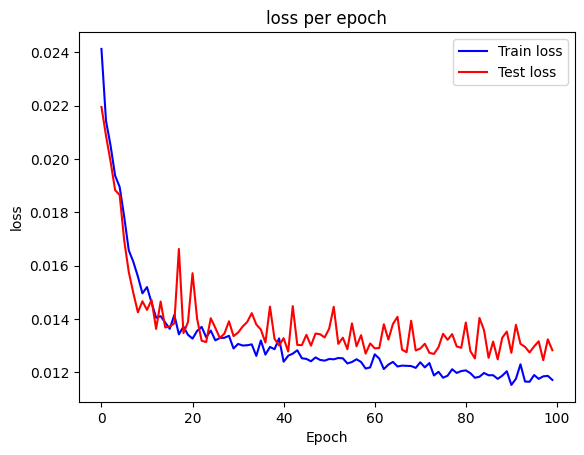

In [ ]:
import matplotlib.pyplot as plt
# Plot the train accuracy values in blue
plt.plot(train_losses, color='blue', label='Train loss')

# Plot the test accuracy values in red
plt.plot(test_losses, color='red', label='Test loss')

# Add a legend to the plot
plt.legend()

# Add labels for the x and y axes
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("loss per epoch")
# Display the plot
plt.show()

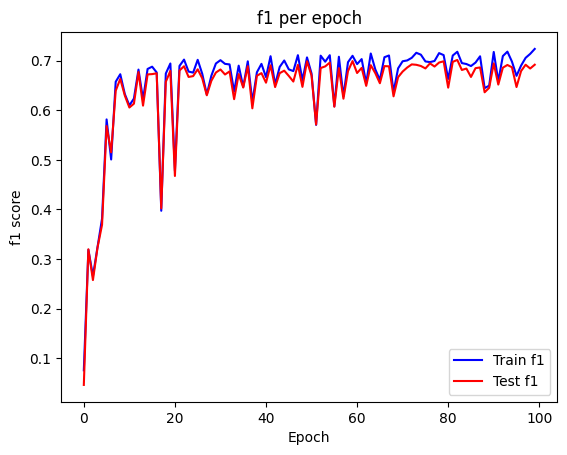

In [ ]:
# Plot the train accuracy values in blue
plt.plot(f1_scores_train, color='blue', label='Train f1')

# Plot the test accuracy values in red
plt.plot(f1_scores_test, color='red', label='Test f1')

# Add a legend to the plot
plt.legend()

# Add labels for the x and y axes
plt.xlabel('Epoch')
plt.ylabel('f1 score')
plt.title("f1 per epoch")
# Display the plot
plt.show()

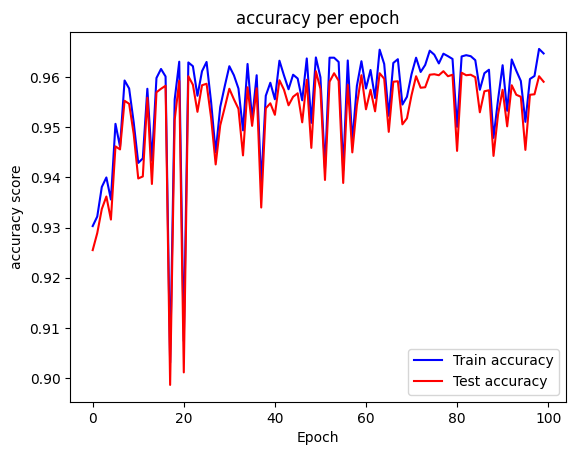

In [ ]:
# Plot the train accuracy values in blue
plt.plot(accuracy_train, color='blue', label='Train accuracy')

# Plot the test accuracy values in red
plt.plot(accuracy_test, color='red', label='Test accuracy')

# Add a legend to the plot
plt.legend()

# Add labels for the x and y axis
plt.xlabel('Epoch')
plt.ylabel('accuracy score')
plt.title("accuracy per epoch")
# Display the plot
plt.show()

In [ ]:
df_train.to_csv("train_categorial_imp.csv",index= False)
df_test.to_csv("test_categorial_imp.csv",index=False)

              precision    recall  f1-score   support

     healthy       0.97      0.98      0.98      9259
        sick       0.72      0.64      0.68       741

    accuracy                           0.95     10000
   macro avg       0.84      0.81      0.83     10000
weighted avg       0.95      0.95      0.95     10000



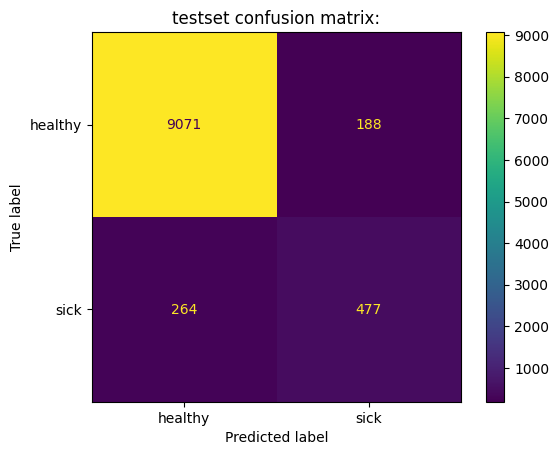

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

model.eval()
y_pred = model(X_val)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
print(classification_report(y_val, y_pred, target_names=["healthy","sick"]))
conf = confusion_matrix(y_val, y_pred,labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=["healthy","sick"])
disp.plot()
plt.title("testset confusion matrix:")
plt.show()

              precision    recall  f1-score   support

     healthy       0.97      0.99      0.98     18585
        sick       0.81      0.65      0.72      1415

    accuracy                           0.96     20000
   macro avg       0.89      0.82      0.85     20000
weighted avg       0.96      0.96      0.96     20000



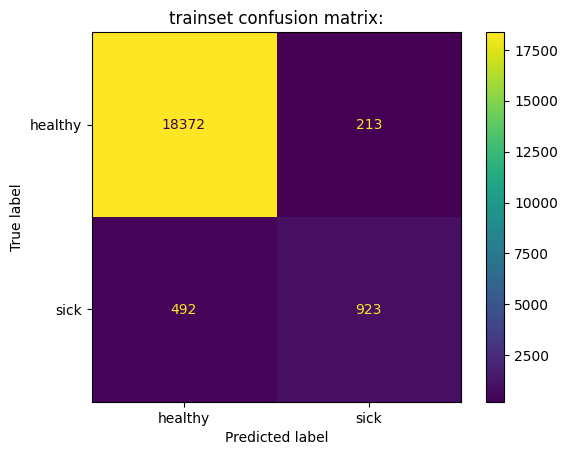

In [ ]:


model.eval()
train_pred = model(X_train)
train_pred = [1 if p >= 0.5 else 0 for p in train_pred]
print(classification_report(y_train, train_pred, target_names=["healthy","sick"]))
conf = confusion_matrix(y_train, train_pred,labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=["healthy","sick"])
disp.plot()
plt.title("trainset confusion matrix:")
plt.show()

In [ ]:
df_train.describe()

,patient,count,Age,Gender,SepsisLabel,mean HR,Q1 HR,Q2 HR,Q3 HR,max HR,min HR,std HR,p1 HR,p2 HR,p3 HR,p4 HR,mean O2Sat,Q1 O2Sat,Q2 O2Sat,Q3 O2Sat,max O2Sat,min O2Sat,std O2Sat,p1 O2Sat,p2 O2Sat,p3 O2Sat,p4 O2Sat,mean Temp,Q1 Temp,Q2 Temp,Q3 Temp,max Temp,min Temp,std Temp,p1 Temp,p2 Temp,p3 Temp,p4 Temp,mean SBP,Q1 SBP,Q2 SBP,Q3 SBP,max SBP,min SBP,std SBP,p1 SBP,p2 SBP,p3 SBP,p4 SBP,mean MAP,Q1 MAP,Q2 MAP,Q3 MAP,max MAP,min MAP,std MAP,p1 MAP,p2 MAP,p3 MAP,p4 MAP,mean DBP,Q1 DBP,Q2 DBP,Q3 DBP,max DBP,min DBP,std DBP,p1 DBP,p2 DBP,p3 DBP,p4 DBP,mean Resp,Q1 Resp,Q2 Resp,Q3 Resp,max Resp,min Resp,std Resp,p1 Resp,p2 Resp,p3 Resp,p4 Resp,max EtCO2,min EtCO2,max BaseExcess,min BaseExcess,max HCO3,min HCO3,max FiO2,min FiO2,max pH,min pH,max PaCO2,min PaCO2,max SaO2,min SaO2,max AST,min AST,max BUN,min BUN,max Alkalinephos,min Alkalinephos,max Calcium,min Calcium,max Chloride,min Chloride,max Creatinine,min Creatinine,max Bilirubin_direct,min Bilirubin_direct,max Glucose,min Glucose,max Lactate,min Lactate,max Magnesium,min Magnesium,max Phosphate,min Phosphate,max Potassium,min Potassium,max Bilirubin_total,min Bilirubin_total,max TroponinI,min TroponinI,max Hct,min Hct,max Hgb,min Hgb,max PTT,min PTT,max WBC,min WBC,max Fibrinogen,min Fibrinogen,max Platelets,min Platelets
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,9999.500000,37.740850,61.668052,0.555500,0.070750,83.747642,78.120359,83.208039,88.774898,101.896025,69.680027,8.267106,84.094976,83.693027,83.626669,83.627242,97.152698,96.241380,97.444987,98.432594,99.553637,91.958150,1.918923,97.664565,97.251979,96.965793,96.800878,36.838671,36.595697,36.864006,37.110849,37.469511,36.069898,0.453310,36.720667,36.889434,36.894623,36.863783,123.203228,114.201573,122.845947,131.745695,152.106129,97.375157,13.675903,123.150649,122.568352,123.306857,124.382477,82.532364,76.252836,81.997673,88.113493,106.007071,64.734768,9.817966,82.923417,82.015367,82.191293,82.963853,64.096169,58.892270,63.464253,68.481703,84.085063,50.340956,8.113179,64.861159,63.671984,63.723483,64.681879,18.551032,16.350398,18.350010,20.509559,26.187453,12.593080,3.383172,18.021389,18.469612,18.709976,18.924710,3.883600,0.298400,1.234400,1.227000,1.768250,1.755700,1.625950,1.636600,1.632600,1.634050,1.587350,1.600900

In [ ]:
def split_by_col(df,col,round_level=1):
  splitted_data = []
  for value in sorted(np.floor(df[col]/round_level).unique()):
    df_temp=pd.DataFrame()
    df_temp = df[np.floor(df[col]/round_level)==value]
    splitted_data.append((df_temp,value*round_level))
  return splitted_data

In [ ]:
def post_Analysis(model,df,feature,round_level=1):
  model.eval()
  dfs = split_by_col(df,feature,round_level)
  f1s = []
  values = []
  sizes = []
  pos = []
  for group,value in dfs:
    group_data,group_labels = data_and_labels(group)
    g_preds = model(group_data)
    g_preds = [1 if p >= 0.5 else 0 for p in g_preds]
    group_f1 = f1_score(group_labels,g_preds)
    f1s.append(np.round(group_f1,2))
    values.append(value)
    sizes.append(len(group_data))
    pos.append(int(sum(group_labels)))
  plt.bar(values, f1s,width = 0.8*round_level)
  plt.xlabel(feature)
  plt.ylabel("f1 score")
  plt.title(f"f1 by value of {feature}")
  for i, size in enumerate(sizes):
    plt.text(values[i], max(f1s[i]-0.4,0.005), f'({pos[i]} sick / {size} patients)', ha='center',va='bottom', fontsize=9,rotation=90)
  plt.show()
# print(f"for mean Temp = {value} we got f1 score of {np.round(group_f1,2)} with {group_data.shape[0]} samples")

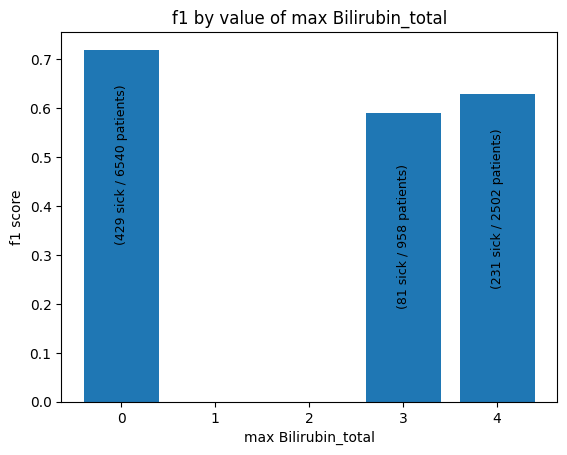

In [ ]:
post_Analysis(model,df_test,"max Bilirubin_total")

In [ ]:
import pickle
file_name = "MLP_model.pkl"

# save
# pickle.dump(model, open(file_name, "wb"))

# load
mlp_model_loaded = pickle.load(open(file_name, "rb"))